  ## DATA ANALYSIS - IPL SOLD PLAYER 2023 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
ipl = pd.read_csv("ipl_2023_dataset.csv")
ipl.head()

,Unnamed: 0,Player Name,Type,Price Cr,Team
0,0,Ben Stokes,All-Rounder,16.25,Chennai Super Kings
1,1,Ravindra Jadeja,All-Rounder,16.00,Chennai Super Kings
2,2,Deepak Chahar,Bowler,14.00,Chennai Super Kings
3,3,MS Dhoni,Wicket-Keeper,12.00,Chennai Super Kings
4,4,Moeen Ali,All-Rounder,8.00,Chennai Super Kings


In [3]:
ipl.loc[ipl["Team"].str.contains("Mumbai Indians")].head()

,Unnamed: 0,Player Name,Type,Price Cr,Team
122,122,Cameron Green,All-Rounder,17.50,Mumbai Indians
123,123,Rohit Sharma,Batter,16.00,Mumbai Indians
124,124,Ishan Kishan,Wicket-Keeper,15.25,Mumbai Indians
125,125,Jasprit Bumrah,Bowler,12.00,Mumbai Indians
126,126,Tim David,Batter,8.25,Mumbai Indians


In [4]:
ipl.columns

Index(['Unnamed: 0', 'Player Name', 'Type', 'Price Cr', 'Team'], dtype='object')

In [5]:
ipl.drop("Unnamed: 0",axis=1,inplace=True)

In [6]:
ipl.shape

(568, 4)

In [7]:
ipl.head()

,Player Name,Type,Price Cr,Team
0,Ben Stokes,All-Rounder,16.25,Chennai Super Kings
1,Ravindra Jadeja,All-Rounder,16.00,Chennai Super Kings
2,Deepak Chahar,Bowler,14.00,Chennai Super Kings
3,MS Dhoni,Wicket-Keeper,12.00,Chennai Super Kings
4,Moeen Ali,All-Rounder,8.00,Chennai Super Kings


In [8]:
ipl.Team.unique()

array(['Chennai Super Kings', 'Delhi Capitals', 'Gujarat Titans',
       'Lucknow Super Giants', 'Mumbai Indians', 'Punjab Kings',
       'Royal Challengers Bangalore', 'Rajasthan Royals',
       'Sunrisers Hyderabad', 'Unsold'], dtype=object)

In [9]:
ipl.Type.unique()

array(['All-Rounder', 'Bowler', 'Wicket-Keeper', 'Batter'], dtype=object)

In [10]:
# check duplicate
ipl.duplicated().sum()

0

In [11]:
ipl.isna().sum()

Player Name      0
Type             0
Price Cr       325
Team             0
dtype: int64

In [12]:
# 325 missing values in "Price Cr" columns are the player who are 'Unsold'
# so let's remove it from dataset
# because over project is on sold player
ipl1= ipl.dropna(axis=0)


In [13]:
ipl1.isna().sum()

Player Name    0
Type           0
Price Cr       0
Team           0
dtype: int64

In [14]:
# before removing rows having null value we have 568 rows 
# after removing null values. remaining rows are 243 
ipl1.shape

(243, 4)

In [15]:
ipl1['Type'].value_counts()

Bowler           99
All-Rounder      61
Batter           55
Wicket-Keeper    28
Name: Type, dtype: int64

In [16]:
ipl1.dtypes

Player Name     object
Type            object
Price Cr       float64
Team            object
dtype: object

In [17]:
# shorting team name to its shorter form ex.MI,CSK,PBK
Team = ipl1.Team.unique()
team_names = {
    "Punjab Kings": "PBK",
    "Mumbai Indians": "MI",
    "Lucknow Super Giants": "LSG",
    "Chennai Super Kings": "CSK",
    "Delhi Capitals": "DC",
    "Gujarat Titans": "GT",
    "Royal Challengers Bangalore": "RCB",
    "Rajasthan Royals": "RR",
    "Sunrisers Hyderabad": "SRH"
}
shortnames = [team_names[name] for name in Team]

print(shortnames)

['CSK', 'DC', 'GT', 'LSG', 'MI', 'PBK', 'RCB', 'RR', 'SRH']


In [18]:
# ipldata= ipl1.drop(['TeamNames','shortnames','Team Names'],axis=1)

In [19]:
# ipldata['Team Names'] = ipldata['Team'].map(team_names)

In [20]:
ipl1['Team Names'] = ipl1['Team'].map(team_names)

C:\Users\msi1\AppData\Local\Temp\ipykernel_6040\957811245.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ipl1['Team Names'] = ipl1['Team'].map(team_names)


In [21]:
ipl1.head()

,Player Name,Type,Price Cr,Team,Team Names
0,Ben Stokes,All-Rounder,16.25,Chennai Super Kings,CSK
1,Ravindra Jadeja,All-Rounder,16.00,Chennai Super Kings,CSK
2,Deepak Chahar,Bowler,14.00,Chennai Super Kings,CSK
3,MS Dhoni,Wicket-Keeper,12.00,Chennai Super Kings,CSK
4,Moeen Ali,All-Rounder,8.00,Chennai Super Kings,CSK


In [22]:
#Data Visualization

<Axes: xlabel='Type', ylabel='TotalPrice'>

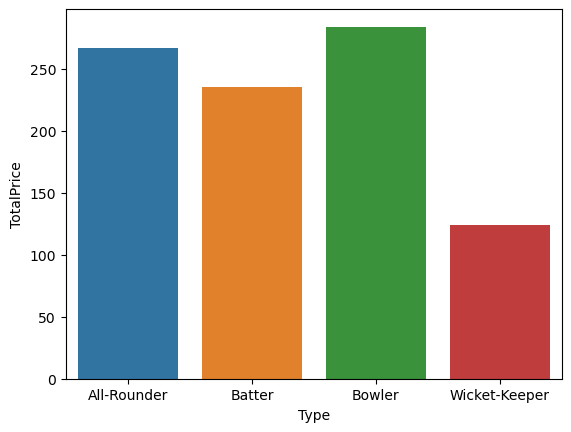

In [23]:
#Money spend by type of players
chart1 = ipl1.groupby("Type")["Price Cr"].sum().reset_index()
chart1.columns = ["Type", "TotalPrice"]
sns.barplot(data=chart1, x=chart1["Type"], y=chart1["TotalPrice"])
# sns.set(font_scale=1.05)
# # Display the chart
# print(chart1)

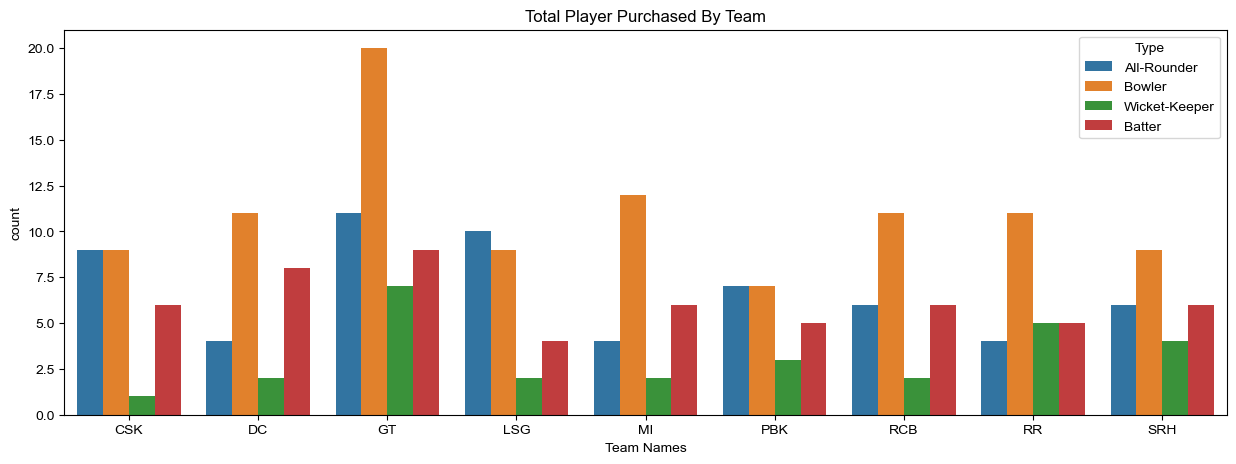

In [24]:
fig, ax = plt.subplots(figsize=(15,5))
sns.countplot(data=ipl1, x=ipl1["Team Names"],hue=ipl1["Type"],ax=ax).set_title("Total Player Purchased By Team")
sns.set(font_scale=1.25)

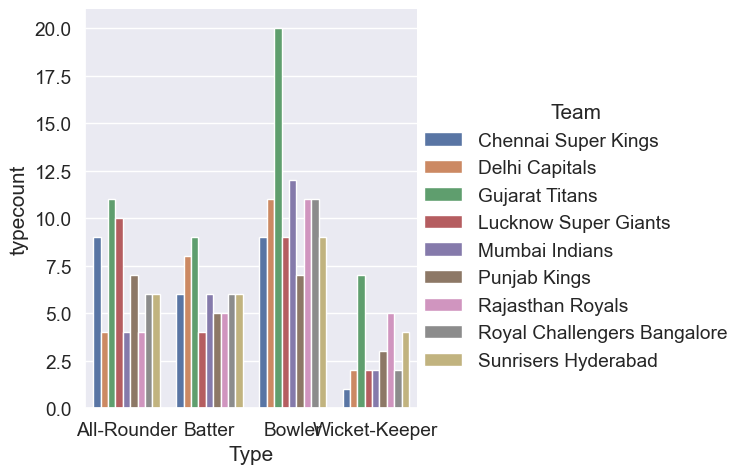

In [28]:
chart2 = ipl1.groupby(["Team","Type"]).agg(typecount=("Type","count")).reset_index()

#chart2
sns.catplot(data=chart2,x="Type", y="typecount",hue="Team",kind="bar")

Text(0.5, 1.0, 'Top 5 Most Costly')

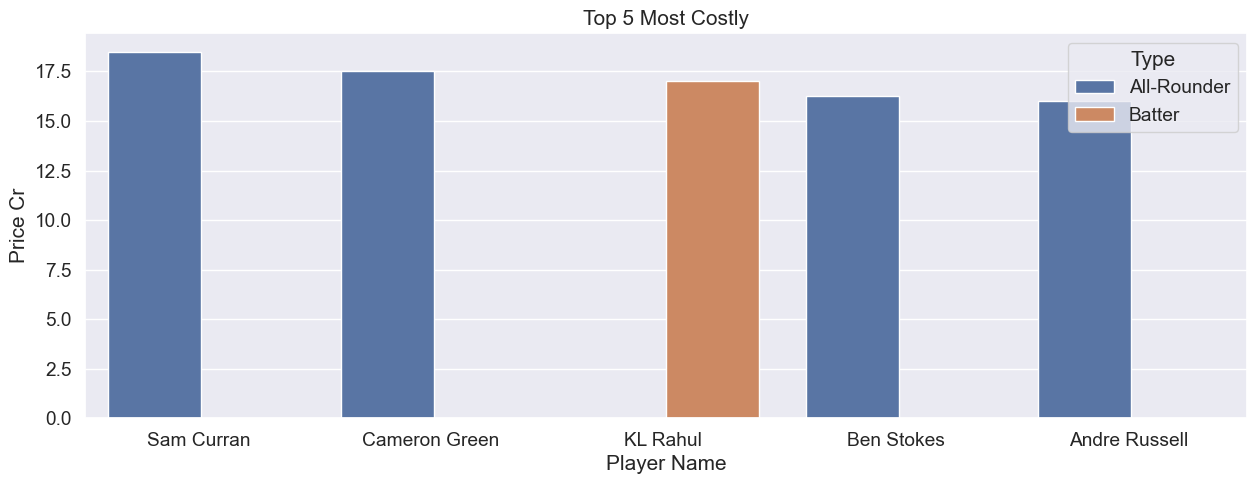

In [26]:

expplayer = ipl1.sort_values(["Price Cr"],ascending=False).head()
#expplayer
fig, ax = plt.subplots(figsize=(15,5))
sns.barplot(data=expplayer,x="Player Name",y="Price Cr",hue="Type",ax=ax).set_title("Top 5 Most Costly")
